In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from scipy import stats
from sklearn.cluster import KMeans
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
df = pd.read_pickle('rentals.pkl')

In [5]:
clean_df = df.drop(['building_id','created','district','description','display_address','features','listing_id',
              'manager_id','date_created','photos','street_address'],axis=1)


In [6]:
X = clean_df.drop(['interest_level'],axis=1)
y = clean_df['interest_level']

### Normalize

In [7]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns, index=X.index)
X = pd.DataFrame(np_scaled)

X.head()


,bathrooms,bedrooms,latitude,longitude,price,cats,dogs,hardwood,prewar,terrace,...,cluster__3,cluster__4,cluster__5,cluster__6,cluster__7,cluster__8,cluster__9,in_manhattan,price_per_bathroom,price_per_bedroom
10,0.15,0.375,0.418426,0.545038,0.000659,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000436,0.000426
10000,0.10,0.250,0.674984,0.496811,0.001208,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.001208,0.001198
100004,0.10,0.125,0.496161,0.426863,0.000625,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000625,0.001250
100007,0.10,0.125,0.544466,0.494819,0.000720,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000720,0.001440
100013,0.10,0.500,0.769034,0.531487,0.000737,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000737,0.000354


In [18]:
def feature_importances(x, top_N_features=7):
    '''
        x: zipped list of features returned from train function
        top_N_featrs: max features to display
    '''
    labels = [x[n][0] for n in range(len(x))][-top_N_features:]
    labels.append('Other')
    values =[x[n][1] for n in range(len(x))][-top_N_features:]
    values.append(1-sum(values))

    fig1, ax1 = plt.subplots()
    ax1.pie(values, labels=labels, autopct=None,
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),
               fontsize=8)
    plt.title("Features by importance")
    plt.show()

In [19]:
def trainRFC(X,y,test_size=.25):
    '''
    params:
        y: target column
        X: training data 
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    RFC = RandomForestClassifier()
    RFC.fit(X_train, y_train)
    display("Score: ",RFC.score(X_test,y_test))
    features = zip(X.columns, RFC.feature_importances_)
    features = sorted(features, key = lambda x:x[1])
    return RFC,features

In [20]:
def trainDecisionTree(X,y,test_size=.25):
    '''
    params:
        y: target column
        X: training data 
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    CLF = DecisionTreeClassifier()
    CLF.fit(X_train, y_train)
    display("Score: ",CLF.score(X_test,y_test))
    features = zip(X.columns, CLF.feature_importances_)
    features = sorted(features, key = lambda x:x[1])
    return CLF,features


In [38]:
def trainLogisticRegressor(X,y,test_size=.25):
    '''
    params:
        y: target column
        X: training data 
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    display("Score: ",LogReg.score(X_test,y_test))
    return LogReg


## Decision Tree

'Score: '

0.66208746545277186

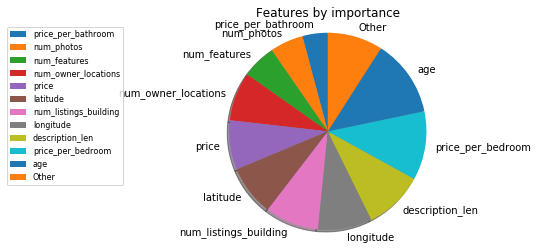

             precision    recall  f1-score   support

       high       0.82      0.82      0.82       948
        low       0.95      0.95      0.95      8515
     medium       0.84      0.86      0.85      2839

avg / total       0.92      0.92      0.92     12302



In [43]:
clf, feats  = trainDecisionTree(X,y)
feature_importances(feats, 11)
print(classification_report(y_test, clf.predict(X_test)))

## Random Forest

'Score: '

0.72793041781824097

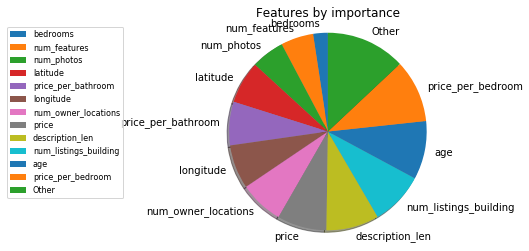

             precision    recall  f1-score   support

       high       0.88      0.79      0.83       948
        low       0.93      0.98      0.95      8515
     medium       0.89      0.78      0.83      2839

avg / total       0.92      0.92      0.91     12302



In [44]:
rfc , feats  = trainRFC(X,y)
feature_importances(feats, 12)
print(classification_report(y_test, rfc.predict(X_test)))

## Logistic Regression

In [46]:
lr = trainLogisticRegressor(X,y)
print(classification_report(y_test, lr.predict(X_test)))

'Score: '

0.69395220289383841

             precision    recall  f1-score   support

       high       0.63      0.01      0.02       948
        low       0.70      0.99      0.82      8515
     medium       0.28      0.02      0.03      2839

avg / total       0.59      0.69      0.57     12302



In [49]:
from sklearn.externals import joblib
joblib.dump(clf, 'randomforest.pkl') 

['randomforest.pkl']